#Importing Libraries


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing dataset

In [102]:
df =pd.read_csv('/content/train_loan.csv')

In [103]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [104]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [105]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [106]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#Perfroming Pre-Processing Steps

In [107]:
#Checking for the missing values
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [108]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [109]:
#checking for the duplicates
df.duplicated().sum()

0

##Handling Missing Values

In [110]:
df['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


In [111]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [112]:
df['Gender'].mode()

,Gender
0,Male


In [113]:
df['Gender'].fillna(df['Gender'].mode(),inplace=True)

<ipython-input-113-b0f625869223>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode(),inplace=True)


In [114]:
#Re-Checking for the null values in the given categorical column 'Gender'.
df['Gender'].isnull().sum()

13

In [115]:
df['Married'].value_counts()

,count
Married,
Yes,398
No,213


In [116]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [117]:
df['Married'].mode()

,Married
0,Yes


In [118]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

<ipython-input-118-0a8ce7f620b8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Married'].fillna(df['Married'].mode()[0],inplace=True)


In [119]:
#Re-Checking for the null values in the given categorical column 'Married'.
df['Married'].isnull().sum()

0

In [120]:
df['Dependents'].mode()

,Dependents
0,0


In [121]:
df['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [122]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [123]:
#Re-Checking for the null values in the given categorical column 'Dependents '.
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

<ipython-input-123-acd00eb1f072>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)


In [124]:
df['Dependents'].isnull().sum()

0

In [125]:
df['Self_Employed'].dtype

dtype('O')

In [126]:
df['Self_Employed'].head()

,Self_Employed
0,No
1,No
2,Yes
3,No
4,No


In [127]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [128]:
df['Self_Employed'].value_counts()

,count
Self_Employed,
No,500
Yes,82


In [129]:
df['Self_Employed'].mode()

,Self_Employed
0,No


In [130]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

<ipython-input-130-ee08122b5980>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)


In [131]:
#Re-checking for the null value
df['Self_Employed'].isnull().sum()

0

In [132]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [133]:
df['LoanAmount'].value_counts()

,count
LoanAmount,
120.0,20
110.0,17
100.0,15
160.0,12
187.0,12
...,...
240.0,1
214.0,1
59.0,1


In [134]:
df['LoanAmount'].dtype

dtype('float64')

In [135]:
df['LoanAmount'].mean()


146.41216216216216

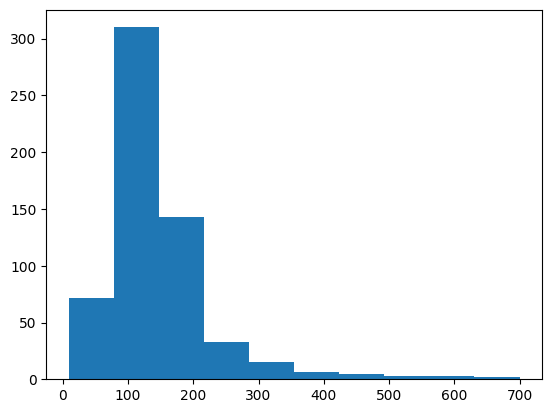

In [136]:
#Checking for whether the column is skewed or not. So plotting histogram
plt.hist(df['LoanAmount'])
plt.show()

In [137]:
df['LoanAmount'].median()

128.0

In [138]:
#As the column is skewed in positive manner, filling null columns with median
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

<ipython-input-138-f199896cad4f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)


In [139]:
df['LoanAmount'].isnull().sum()

0

In [140]:
Loan_Amount_Term	14
Credit_History	50

SyntaxError: invalid syntax (<ipython-input-140-20543a4945ea>, line 1)

In [141]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [142]:
df['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
240.0,4
84.0,4
120.0,3
60.0,2
36.0,2


In [143]:
df['Loan_Amount_Term'].dtype

dtype('float64')

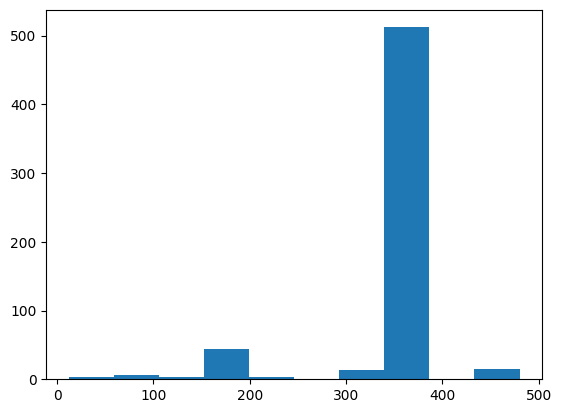

In [144]:
plt.hist(df['Loan_Amount_Term'])
plt.show()

In [145]:
df['Loan_Amount_Term'].mean()

342.0

In [146]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

<ipython-input-146-bee070ecf46b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)


In [147]:
df['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89


In [148]:
df['Credit_History'].dtype

dtype('float64')

In [149]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [153]:
#Again checking for the null values
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

<ipython-input-153-92fe699f636e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)


In [154]:
df['Credit_History'].isnull().sum()

0

In [155]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


#Outlier detection

In [157]:
#Checking data types for outlier detection
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [158]:
#Selecting all the numerical ciolumns
numerical_columns =df.select_dtypes(include=['int64', 'float64'])


In [160]:
numerical_columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


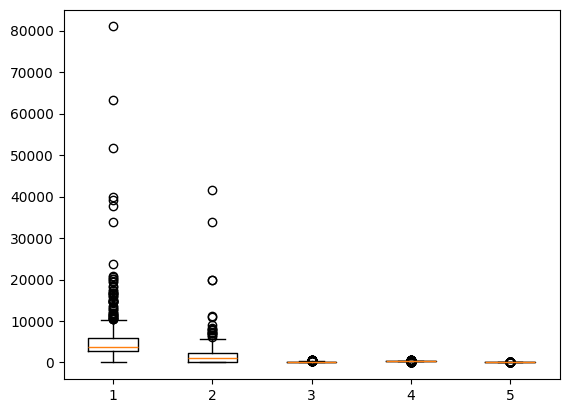

In [171]:
plt.boxplot(numerical_columns)
plt.show()

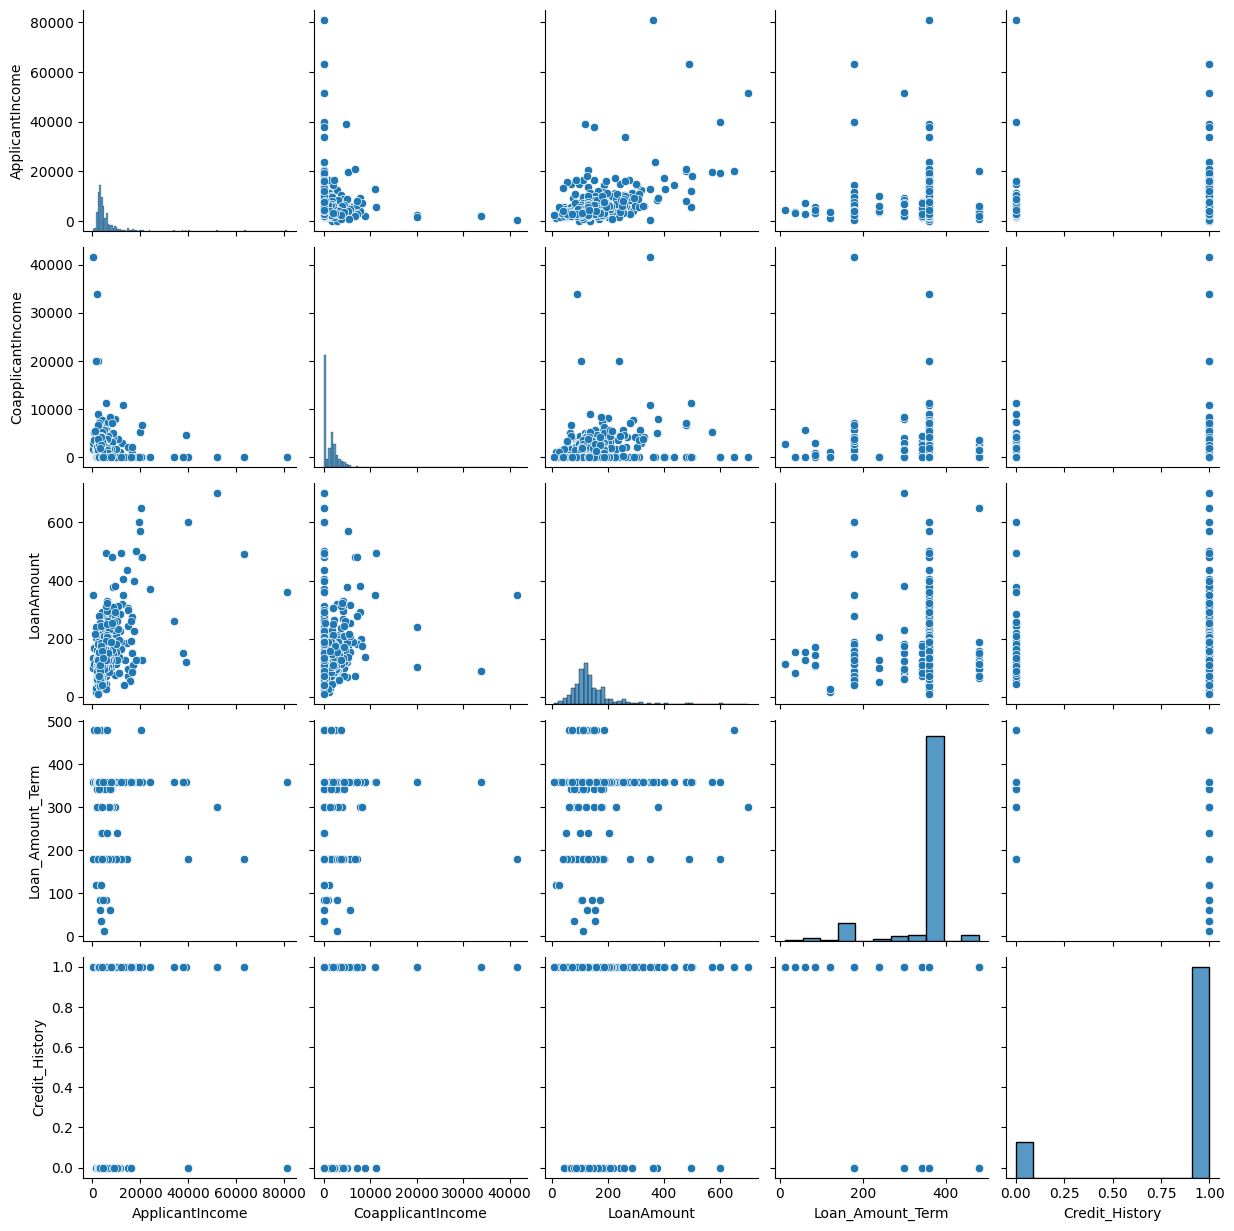

In [170]:
#Plotting Pair plot
sns.pairplot(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']])
plt.show()

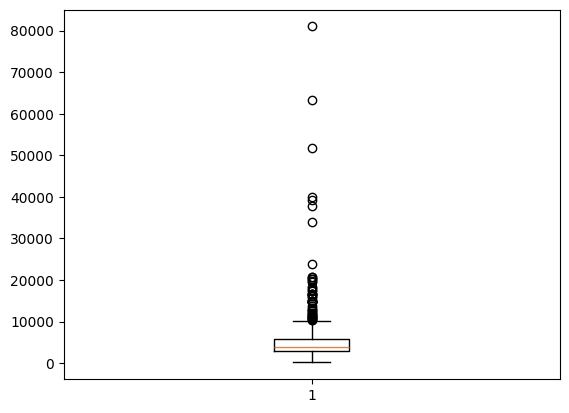

In [172]:
plt.boxplot(df['ApplicantIncome'])
plt.show()

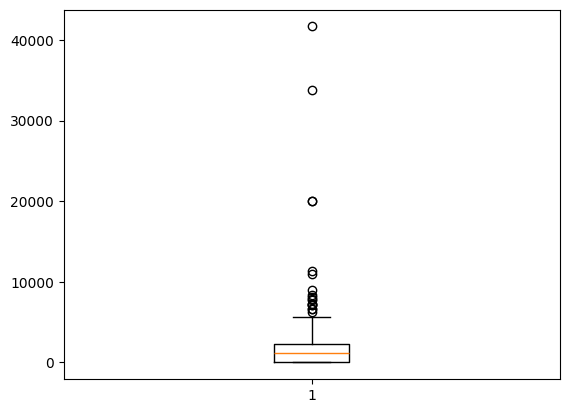

In [173]:
plt.boxplot(df['CoapplicantIncome'])
plt.show()

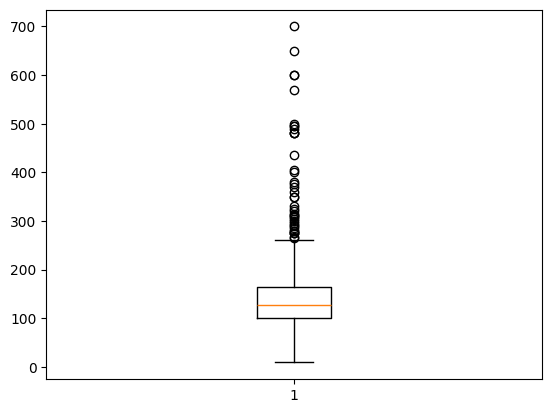

In [174]:
plt.boxplot(df['LoanAmount'])
plt.show()

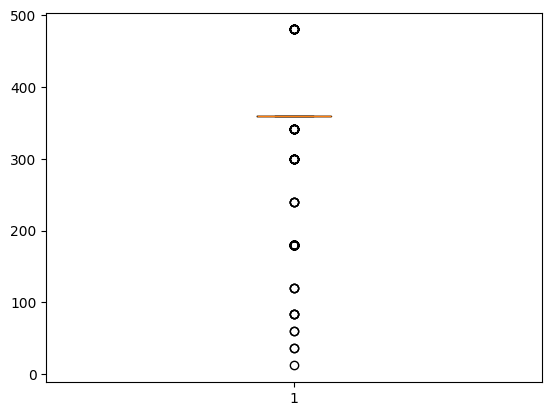

In [175]:
plt.boxplot(df['Loan_Amount_Term'])
plt.show()

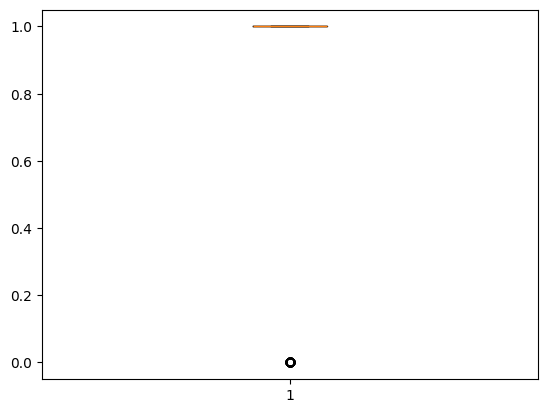

In [176]:
plt.boxplot(df['Credit_History'])
plt.show()

#Encoding

In [178]:
from sklearn.preprocessing import LabelEncoder
label_en = LabelEncoder()

In [179]:
df['Loan_ID']=label_en.fit_transform(df['Loan_ID'])

In [181]:
#one-hot encoding
df=pd.get_dummies(df,dtype=int)

In [182]:
df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0,5849,0.0,128.0,360.0,1.0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
2,2,3000,0.0,66.0,360.0,1.0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1
3,3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,...,0,0,1,1,0,0,0,1,0,1
4,4,6000,0.0,141.0,360.0,1.0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1


#Scaling

In [183]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [184]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [185]:
sc.fit_transform(df[numerical_columns])

array([[ 0.07299082, -0.55448733, -0.21124125,  0.27985054],
       [-0.13441195, -0.03873155, -0.21124125,  0.27985054],
       [-0.39374734, -0.55448733, -0.94899647,  0.27985054],
       ...,
       [ 0.43717437, -0.47240418,  1.27616847,  0.27985054],
       [ 0.35706382, -0.55448733,  0.49081614,  0.27985054],
       [-0.13441195, -0.55448733, -0.15174486,  0.27985054]])

In [186]:
df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0,5849,0.0,128.0,360.0,1.0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
2,2,3000,0.0,66.0,360.0,1.0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1
3,3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,...,0,0,1,1,0,0,0,1,0,1
4,4,6000,0.0,141.0,360.0,1.0,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
